# Lesson 4: Sorting, Aggregation, and Subsets

# Initial Setup

Import libraries and initialize variables to pick up where we left off in Lesson 3.

In [1]:
import pandas as pd

%matplotlib inline

In [2]:
weather_all = pd.read_csv('data/weather_airport_stations.csv')

# Sorting

- It's often convenient to have our data in a sorted form
- We can also use sorting to answer questions about the extreme (highest / lowest) values in our data

We can sort an entire DataFrame based on the values in a column using the `sort_values` method:

In [3]:
weather_sorted = weather_all.sort_values('Temperature (C)')
weather_sorted.head()

,Datetime,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
125,2018-05-22 6:00,Canada/Eastern,6,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-7.1,77.0,-11.0,NaN,101.0,24.0,NW,22.0,-15
124,2018-05-22 5:00,Canada/Eastern,5,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-7.0,76.0,-10.0,NaN,101.1,24.0,NW,23.0,-15
126,2018-05-22 7:00,Canada/Eastern,7,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.9,73.0,-11.0,NaN,101.0,10.0,NNW,26.0,-15
122,2018-05-22 3:00,Canada/Eastern,3,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.6,83.0,-9.0,NaN,101.1,16.0,NW,16.0,-13
123,2018-05-22 4:00,Canada/Eastern,4,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.6,78.0,-10.0,NaN,101.0,32.0,NW,25.0,-14


- The above code does not modify our original DataFrame `weather_all`
- Looking at `weather_sorted`, we can answer questions like:
  - What station(s) and datetimes had the coldest temperatures?
  - What were the weather conditions and other measurements (relative humidity, pressure, etc.) during these coldest temperatures?

- `sort_values` sorts in ascending order (lowest to highest) by default
- We can switch this using the `ascending` keyword argument:

In [4]:
column = 'Temperature (C)'
weather_all.sort_values(column, ascending=False).head()

,Datetime,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
231,2018-05-22 14:00,Canada/Central,14,YQR,Regina Int'l Airport,50.43,-104.67,Mostly Cloudy,28.6,23.0,6.0,NaN,101.1,24.0,NW,21.0,NaN
234,2018-05-22 17:00,Canada/Central,17,YQR,Regina Int'l Airport,50.43,-104.67,Mostly Cloudy,28.5,23.0,6.0,NaN,101.2,24.0,ESE,20.0,NaN
256,2018-05-22 16:00,Canada/Central,16,YWG,Winnipeg Richardson Int'l Airport,49.91,-97.24,Mostly Cloudy,28.5,26.0,7.0,NaN,101.3,24.0,SSE,21.0,NaN
278,2018-05-22 15:00,Canada/Eastern,15,YQT,Thunder Bay Airport,48.37,-89.32,Mostly Cloudy,28.2,17.0,1.0,NaN,101.4,32.0,SW,22.0,NaN
257,2018-05-22 17:00,Canada/Central,17,YWG,Winnipeg Richardson Int'l Airport,49.91,-97.24,Mostly Cloudy,28.2,28.0,8.0,29.0,101.3,24.0,S,9.0,NaN


# Aggregation

- So far we have looked at statistics for entire columns of a DataFrame
- With aggregation, we can answer questions about sub-groups within columns, such as:
  - What are the mean, minimum, and maximum temperatures at each station in `weather_all`?

We can aggregate data with the `groupby` method chained with an aggregation method (e.g., `mean`, `sum`, `max`, `min`, `count`)
- For example, find the mean values for each station:

In [5]:
station_means = weather_all.groupby('Station Name').mean()
station_means

,Hour of Day,Latitude,Longitude,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Speed (km/hr)
Station Name,,,,,,,,,,
Calgary Int'l Airport,11.5,51.12,-114.01,18.554167,42.666667,4.541667,NaN,101.537500,43.333333,11.375000
Charlottetown Airport,11.5,46.29,-63.12,10.291667,54.791667,0.500000,NaN,101.887500,24.000000,15.750000
Edmonton Int'l Airport,11.5,53.31,-113.58,17.950000,48.041667,5.083333,22.000000,101.400000,24.000000,7.791667
Fredericton Int'l Airport,11.5,45.87,-66.54,12.973913,53.695652,2.260870,NaN,101.821739,16.000000,16.260870
Halifax Stanfield Int'l Airport,11.5,44.88,-63.51,11.787500,48.166667,-0.217391,NaN,102.091667,24.000000,16.000000
Iqaluit Airport,11.5,63.76,-68.56,-5.283333,79.750000,-8.291667,NaN,100.937500,21.583333,31.708333
Montreal-Trudeau Int'l Airport,11.5,45.47,-73.74,16.508333,67.333333,9.916667,23.000000,101.595833,26.875000,11.041667
Ottawa Macdonald-Cartier Int'l Airport,11.5,45.32,-75.67,14.441667,77.208333,10.250000,NaN,101.616667,22.716667,7.458333
Prince George Airport,11.5,53.88,-122.68,15.300000,60.916667,6.166667,22.500000,101.362500,15.791667,6.666667


For more complex aggregations, there is a `pivot_table` method.

Create a bar chart of the mean temperature at each station:

In [6]:
temp_means = station_means['Temperature (C)']
temp_means

Station Name
Calgary Int'l Airport                     18.554167
Charlottetown Airport                     10.291667
Edmonton Int'l Airport                    17.950000
Fredericton Int'l Airport                 12.973913
Halifax Stanfield Int'l Airport           11.787500
Iqaluit Airport                           -5.283333
Montreal-Trudeau Int'l Airport            16.508333
Ottawa Macdonald-Cartier Int'l Airport    14.441667
Prince George Airport                     15.300000
Quebec Lesage Int'l Airport               15.941667
Regina Int'l Airport                      20.308333
Saskatoon Diefenbaker Int'l Airport       19.104167
St. John's Int'l Airport                   4.408333
Thunder Bay Airport                       16.141667
Toronto Pearson Int'l Airport             14.087500
Vancouver Int'l Airport                   15.608333
Victoria Int'l Airport                    15.920833
Whitehorse Airport                         9.166667
Winnipeg Richardson Int'l Airport         20.758333

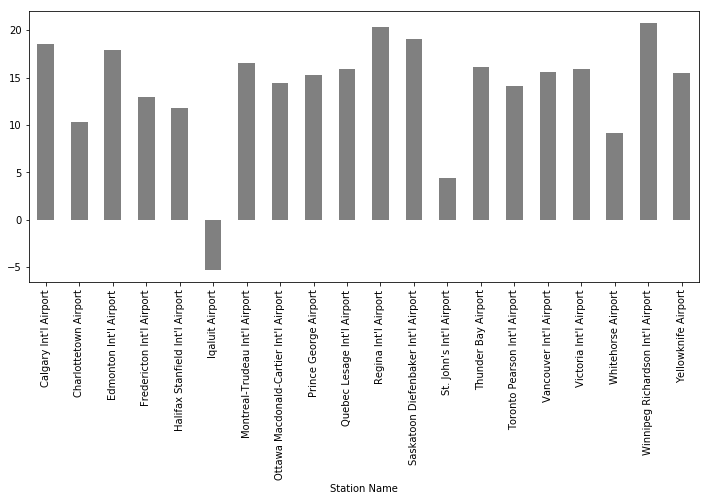

In [7]:
temp_means.plot(kind='bar', color='0.5', figsize=(12, 5));

We can use the `sort_values` method on the `temp_means` Series to find out which station had the highest mean temperature:

In [8]:
temp_means.sort_values(ascending=False)

Station Name
Winnipeg Richardson Int'l Airport         20.758333
Regina Int'l Airport                      20.308333
Saskatoon Diefenbaker Int'l Airport       19.104167
Calgary Int'l Airport                     18.554167
Edmonton Int'l Airport                    17.950000
Montreal-Trudeau Int'l Airport            16.508333
Thunder Bay Airport                       16.141667
Quebec Lesage Int'l Airport               15.941667
Victoria Int'l Airport                    15.920833
Vancouver Int'l Airport                   15.608333
Yellowknife Airport                       15.479167
Prince George Airport                     15.300000
Ottawa Macdonald-Cartier Int'l Airport    14.441667
Toronto Pearson Int'l Airport             14.087500
Fredericton Int'l Airport                 12.973913
Halifax Stanfield Int'l Airport           11.787500
Charlottetown Airport                     10.291667
Whitehorse Airport                         9.166667
St. John's Int'l Airport                   4.408333

# Data Subsets

- So far we've been working with entire DataFrames and individual columns
- We can also extract other subsets of a DataFrame:
  - Multiple columns
  - Select rows based on row numbers or row labels
  - Select rows based on a criteria

## Selecting columns of a DataFrame

In [9]:
weather_all.head()

,Datetime,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
0,2018-05-21 22:00,Canada/Pacific,22,YVR,Vancouver Int'l Airport,49.19,-123.18,Mainly Clear,14.8,75.0,10.0,NaN,101.6,48.0,N,5.0,NaN
1,2018-05-21 23:00,Canada/Pacific,23,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,13.5,76.0,9.0,NaN,101.6,32.0,NaN,0.0,NaN
2,2018-05-22 0:00,Canada/Pacific,0,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,13.1,77.0,9.0,NaN,101.6,32.0,E,11.0,NaN
3,2018-05-22 1:00,Canada/Pacific,1,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,12.9,84.0,10.0,NaN,101.6,32.0,E,8.0,NaN
4,2018-05-22 2:00,Canada/Pacific,2,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,12.2,88.0,10.0,NaN,101.6,32.0,E,12.0,NaN


Get a subset of the DataFrame with only the columns `'Station Name'`, `'Wind Speed (km/hr)'` and `'Temperature (C)'`, in that order:

In [10]:
columns = ['Station Name', 'Wind Speed (km/hr)', 'Temperature (C)']
winds_temp = weather_all[columns]
winds_temp.head()

,Station Name,Wind Speed (km/hr),Temperature (C)
0,Vancouver Int'l Airport,5.0,14.8
1,Vancouver Int'l Airport,0.0,13.5
2,Vancouver Int'l Airport,11.0,13.1
3,Vancouver Int'l Airport,8.0,12.9
4,Vancouver Int'l Airport,12.0,12.2


With a subset such as `winds_temp`, we can display summaries for just the columns we're interested in. For example, aggregate to find the maximum wind speed and temperature at each station:

In [11]:
winds_temp.groupby('Station Name').max()

,Wind Speed (km/hr),Temperature (C)
Station Name,,
Calgary Int'l Airport,21.0,25.5
Charlottetown Airport,32.0,17.7
Edmonton Int'l Airport,16.0,27.4
Fredericton Int'l Airport,35.0,21.8
Halifax Stanfield Int'l Airport,31.0,15.9
Iqaluit Airport,54.0,-2.8
Montreal-Trudeau Int'l Airport,25.0,22.4
Ottawa Macdonald-Cartier Int'l Airport,13.0,18.0
Prince George Airport,18.0,26.5


## Selecting rows of a DataFrame
- Selecting rows based on position or row label is actually a fairly complex topic, which we won't cover today
- Let's look at how to select rows based on a criteria
  - Similar to applying a filter in Excel

Where is it snowing?
- Use the string method `contains` on the `'Conditions'` column

In [12]:
snowing = weather_all['Conditions'].str.contains('Snow')
print(len(snowing))
snowing.head()

480


0    False
1    False
2    False
3    False
4    False
Name: Conditions, dtype: object

- `snowing` is a Boolean Series of length equal to the number of rows of `weather_all`
- The index of `snowing` is equal to the index of `weather_all`
- We can sum the Series to find out how many rows with snowing conditions are in our data:

In [13]:
num_snowing = snowing.sum()
num_snowing

15

Alternatively, we could also use `value_counts` to tally up the snowing conditions:

In [14]:
snowing.value_counts(dropna=False)

False    464
True      15
NaN        1
Name: Conditions, dtype: int64

We can use `snowing` as a **filter** to extract the rows with snowing weather conditions
- However, our filter can only contain `True` or `False` values
- We need to fill the missing value (`NaN`)
  - Use the `fillna` method to fill the missing with a value of `False`

In [15]:
snowing_filled = snowing.fillna(False)
snowing_filled.value_counts(dropna=False)

False    465
True      15
Name: Conditions, dtype: int64

Now we're ready to apply our filter and find out where it's snowing:

In [16]:
weather_snowing = weather_all[snowing_filled]
weather_snowing

,Datetime,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
120,2018-05-22 1:00,Canada/Eastern,1,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.3,80.0,-9.0,NaN,101.1,24.0,NNW,19.0,-13
121,2018-05-22 2:00,Canada/Eastern,2,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.4,81.0,-9.0,NaN,101.1,24.0,NNW,20.0,-13
122,2018-05-22 3:00,Canada/Eastern,3,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.6,83.0,-9.0,NaN,101.1,16.0,NW,16.0,-13
123,2018-05-22 4:00,Canada/Eastern,4,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.6,78.0,-10.0,NaN,101.0,32.0,NW,25.0,-14
124,2018-05-22 5:00,Canada/Eastern,5,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-7.0,76.0,-10.0,NaN,101.1,24.0,NW,23.0,-15
125,2018-05-22 6:00,Canada/Eastern,6,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-7.1,77.0,-11.0,NaN,101.0,24.0,NW,22.0,-15
126,2018-05-22 7:00,Canada/Eastern,7,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.9,73.0,-11.0,NaN,101.0,10.0,NNW,26.0,-15
127,2018-05-22 8:00,Canada/Eastern,8,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.5,77.0,-10.0,NaN,101.0,10.0,NW,24.0,-14
128,2018-05-22 9:00,Canada/Eastern,9,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.5,78.0,-10.0,NaN,101.0,10.0,NNW,31.0,-15
129,2018-05-22 10:00,Canada/Eastern,10,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.0,80.0,-9.0,NaN,101.0,6.0,NNW,25.0,-14


In [17]:
weather_snowing['Station Name'].unique()

array(['Iqaluit Airport'], dtype=object)

It's snowing at one station&mdash;Iqaluit Airport!

- How many stations have temperatures greater than 20 C?
- Which station had the highest number of hours with temperatures greater than 20 C?

Use a comparison operator to create a filter:

In [18]:
temp_warm = weather_all['Temperature (C)'] > 20
temp_warm.head()

0    False
1    False
2    False
3    False
4    False
Name: Temperature (C), dtype: bool

See how many `True` and `False` are in our filter, and check for missings:

In [19]:
temp_warm.value_counts(dropna=False)

False    373
True     107
Name: Temperature (C), dtype: int64

Temperatures are greater than 20 C in 107 rows of our data, but this doesn't tell us the number of stations, since each station might have multiple rows (multiple hours) with temperatures greater than 20 C.

Use the filter `temp_warm` to extract the rows of `weather_all` which have temperatures greater than 20 C:

In [20]:
weather_warm = weather_all[temp_warm]
weather_warm.head(3)

,Datetime,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
19,2018-05-22 17:00,Canada/Pacific,17,YVR,Vancouver Int'l Airport,49.19,-123.18,Mainly Sunny,20.1,64.0,13.0,23.0,101.1,48.0,WSW,9.0,NaN
39,2018-05-22 13:00,Canada/Pacific,13,YYJ,Victoria Int'l Airport,48.65,-123.43,Mainly Sunny,20.5,56.0,12.0,23.0,101.4,32.0,E,12.0,NaN
40,2018-05-22 14:00,Canada/Pacific,14,YYJ,Victoria Int'l Airport,48.65,-123.43,Mainly Sunny,22.6,52.0,13.0,25.0,101.3,32.0,E,8.0,NaN


The number of stations with temperature greater than 20 C is:

In [21]:
weather_warm['Station Name'].nunique()

13

List these stations and the number of hours at each station with temperatures greater than 20 C:

In [22]:
weather_warm['Station Name'].value_counts()

Winnipeg Richardson Int'l Airport      13
Edmonton Int'l Airport                 12
Calgary Int'l Airport                  12
Thunder Bay Airport                    11
Regina Int'l Airport                   11
Saskatoon Diefenbaker Int'l Airport    10
Prince George Airport                   9
Quebec Lesage Int'l Airport             7
Victoria Int'l Airport                  7
Yellowknife Airport                     5
Fredericton Int'l Airport               5
Montreal-Trudeau Int'l Airport          4
Vancouver Int'l Airport                 1
Name: Station Name, dtype: int64

Winnipeg Richardson Int'l Airport had the highest occurrence (13 hours) of temperatures greater than 20 C

# Lesson 4 Recap

### Sorting

Sort a DataFrame based on the values in the column `'Column B'`:
```
df.sort_values('Column B')
```
To sort in descending order, use the keyword argument `ascending=False`


### Aggregation

For basic aggregation operations, use the `groupby` method chained with an aggregation method (e.g., `mean`, `sum`, `max`, `min`, `count`).

For example, to find the mean values for data grouped by `'Column B'`: `
```
df.groupby('Column B').mean()
```

### Subsets

#### Selecting Columns

To select a subset of columns from a DataFrame: 
```
df_sub = df[['Column C', 'Column A', 'Column B']]
```

#### Selecting Rows with a Filter

To select a subset of rows with a filter:
  - Create a filter (Boolean Series)
  - Fill any missings in the filter using the `fillna` method (if necessary)
  - Use the filter to extract the desired rows from the DataFrame

Filter Example 1: string method `contains` with text data
```
snowing = weather_all['Conditions'].str.contains('Snow')
snowing = snowing.fillna(False)
weather_snowing = weather_all[snowing]
```

Filter Example 2: comparison operator with numerical data
```
temp_warm = weather_all['Temperature (C)'] > 20
temp_warm = temp_warm.fillna(False)
weather_warm = weather_all[temp_warm]
```

# Exercise 4

a) What is the fastest wind speed in `weather_all`, and at what station and datetime did it occur? What were the wind direction, temperature, and weather conditions (raining / sunny / etc.) that accompanied this fastest wind speed?

b) How many stations had wind speeds greater than 30 km/hr? Which stations were they?

#### Bonus exercises

c) What were the top three windiest stations, based on their maximum wind speeds? What were the maximum wind speeds at each of these stations?

d) Do the top three stations from (c) change if you rank your stations based on mean wind speed instead of maximum wind speed?